### UR Bootcamp Team Project:  Diana, Marie, Irene
### Homework #7: Using APIs, statisics and mapping to conduct regional economic data analyses

## *Analysis of Richmond Metro Businesses and Associated Economics by Zip Code area*

###  Problem Statement:

In this study, we are interested in what major employers are in the metro Richmond area, where they are located
as indicated by zip code and whether there are associations with adjoining poverty, salary rates, and home values.

In addition, we consider the overall types of employers in the Greater Richmond, as an indicator for those likely 
to hire data analysts or IT professionals.  We also compare the connection to the "2018 Best Places to Work" 
as determined from the Richmond Times Digest annual survey to the largest private employers in the region.


### Initial Research Questions:

*  What is the economic "backdrop" for economic development in the Richmond area, based on demographics?
   Where are the highs/lows?
*  What businesses form the economic basis of the Richmond Area?
*  Are there clear relationships between the presence of businesses and the demographics of surrounding areas?
*  Where might there be opportunities for business development?
*  Which business lines are likely to require data analysts and IT professionals?
*  Is there a connection between the largest employers and best places to work?


### Government Data used in the analysis
    
<img src="./Resources/Census_logo.png"
	title="Census" width="150" height="100" align = "right" />

The United States Census Bureau API was accessed to obtain and map demographic data 
by Zip Codes for Richmond and 13 surrounding counties:
    
    * poverty rate
    * unemployment rate
    * median income
    * median home values


### Public Data used in the analysis
    
<img src="./Resources/BestPlacestoWork.jpg"
	title="Places" width="150" height="100" align = "right" />

The Richmond Times Digest conducts a "Best Places to Work in Richmond" annual survey that solicits inputs
from small, mid-size, large, and mega-large companies in the region.  The survey received responses from 
about 17,760 employees on numerous topics affecting workplace life, from their views 
on leadership, managers, pay and benefits to training and work-life balance. It also looked at other factors 
including how employers encourage community involvement and how businesses promote diversity.  

Sixty-five businesses were recognized as "Best Places to Work in 2018" and provided in an online Excel file.



### Private Data used in the analysis
    
<img src="./Resources/GRP_Logo.png"
	title="GRP" width="150" height="100" align = "right" />

### About the Greater Richmond Partnership

The Greater Richmond Partnership, Inc. (GRP) is the lead regional economic development organization for the City of Richmond
and the counties of Chesterfield, Hanover and Henrico in Virginia. GRP impacts the Richmond Region by recruiting companies 
from all over the globe, which provide employment opportunities and taxable capital investment for our local community.

Much of the specific business data that is needed to understand both business interests and patterns of development are not
publically available without paying for data access.  As a proactive measure, our team reached out to the VP of Business Development
and Research at the GRP, described our involvement in the UR Bootcamp class, and requested the opportunity to work with
some of the GRP data sets as a means to learn data analytics techniques as well as economic development in Richmond. 

The GRP provided several data sets describing businesses in the Richmond area, including a compilation of all businesses
with more than 5 employees by "Main Line of Business".

> ##  Analysis Results
> Regional statistics: mean, max, min, quartiles for the unemployment, poverty, income, median housing
    
> ### Population by zip

>**Figure 1. Poverty Density per zip code area**  (Diana)
>  (Add the river and counties)
>
>  There is a strong relationship...
>Downtown Richmond has some of the highest poverty rates, > 30%.  
>Manquin is anomalous with the highest rate/concentration (rural, low population)
                                                                                                    
>
> ### **Figure 2. Income Levels per zip code area**  (Diana)
> Suburbs of Richmond are higher overall income
> (North) West End of Richmond has highest income (Carmax and CapOne, Markel, AECOM)
> (South of the River, Midlothian) along the river has higher values

> ### **Figure 3. Unemployment Levels per zip code area**  (Diana)
> fix scaling..  less conclusive per geography
>
> ### **Figure 4. Median Housing per zip code area**  (Diana)
> Along the river (north and south and west).  Along 64 Corridor to the ocean
>
> ### **Figure 5. Business density per zip code area**  (Marie)
>
>
> ### **Figure 6. Major business categories from Master List**  (Marie)

>
> ### **Figure 7. Correlation between largest employers and Best Places to Work**  (Irene)
>  Only 10 of the Best on the Largest list

>
>### **Figure 8. Possible geographic targets for economic development where financial incentives might help
> Prospectives for employment (All)
> Markers on our maps
>
>**
> ### ADDTIONAL WORK: 
>
> ### ****
>
>
>
> ## Conclusions.
>
>1. 
>2. 
>3. 
>4. 

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import gmaps
from scipy import stats
import pandas as pd
import numpy as np
import requests
import time
import json
from time import gmtime, strftime 

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')



In [51]:
# Read the Metro area business data from the csv Master file.
business_data_to_load = "Master_Employers_nohdr.csv"
#print(business_data_to_load)

# Not every CSV requires an encoding, but be aware this can come up
business_data = pd.read_csv(business_data_to_load, encoding="ISO-8859-1")

#business_data.head()

main_biz = business_data["Main Line of Business"].dropna()
print(len(main_biz))
#main_biz.head()
counts = pd.DataFrame(main_biz.value_counts()).rename({"Nonclassified Establishments": "Consulting & LLCs"})
counts.head()

23600


,Main Line of Business
Restaurants,1851
Consulting & LLCs,883
Residential Building Construction,629
Physicians & Surgeons,609
Churches,559


In [64]:
comp_gt_1 = counts[counts["Main Line of Business"] > 1]
comp_gt_1.head(10)


,Main Line of Business
Restaurants,1851
Consulting & LLCs,883
Residential Building Construction,629
Physicians & Surgeons,609
Churches,559
Beauty Salons,481
Elementary & Secondary Schools,369
"Insurance Agents, Brokers, & Service",366
Convenience Stores,315
Real Estate Agents & Managers,311


In [62]:
comp_gt_1.tail(10)

,Main Line of Business
Satellite Installation,2
Rooming & Boarding Houses,2
Luggage & Leather Goods Stores,2
Communication & Computer Security System Services,2
Bottled Water Companies,2
"Paints, Varnishes, Lacquers, Enamels, & Allied Products Mfg",2
Concrete Products Wholesale,2
Roofing Consultants,2
Executive Search Consultants,2
Hair Goods & Supplies Stores,2


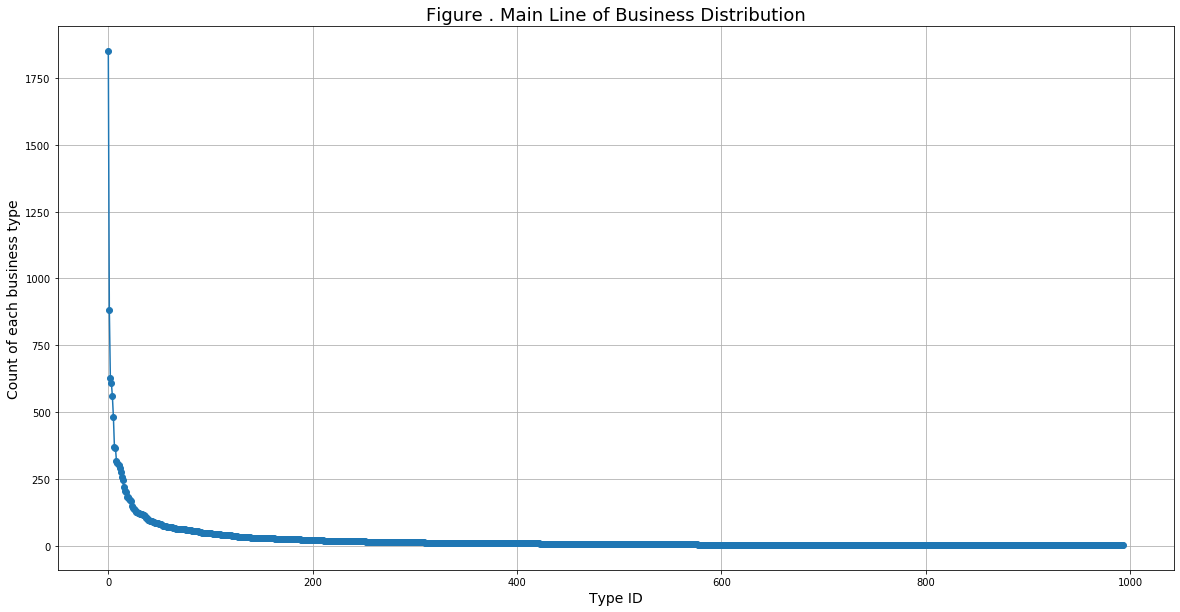

In [97]:
# Plot businesses as a distribution

plt.figure(figsize=(20,10))
plt.title('Figure . Main Line of Business Distribution', fontsize=18)
plt.xlabel('Type ID', fontsize=14)
plt.ylabel('Count of each business type', fontsize=14)
plt.grid()
# Set x axis and tick locations
x_axis = np.arange(len(comp_gt_1))

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
#plt.scatter(x_axis, comp_gt_1, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_axis, comp_gt_1, marker="o")

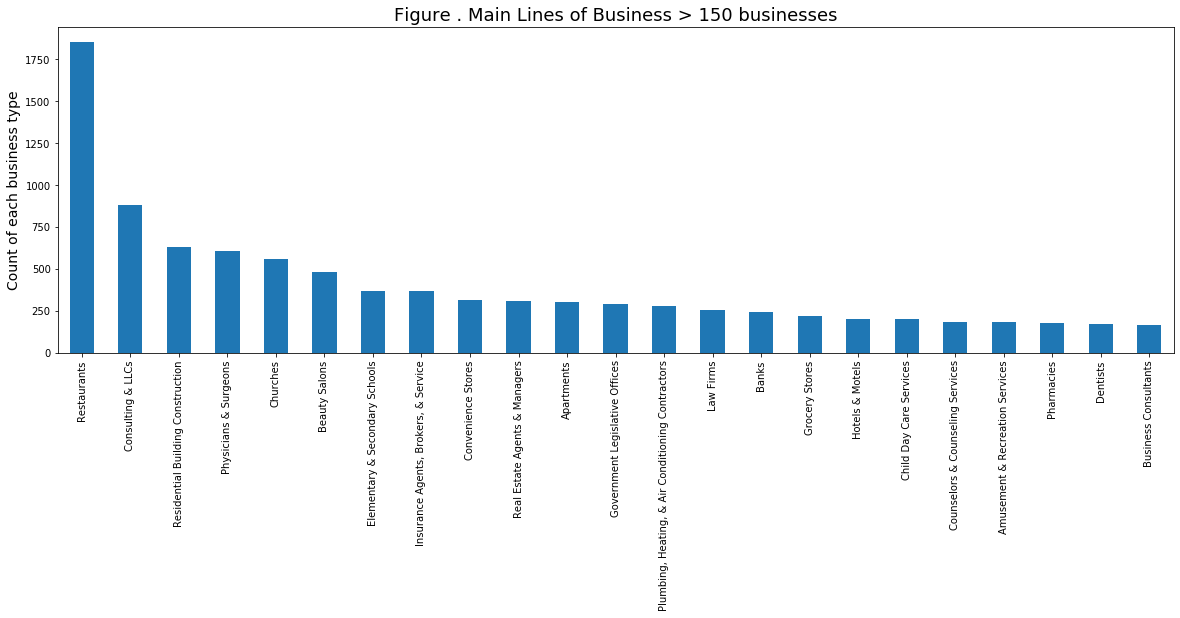

In [102]:
comp_gt_150 = counts[counts["Main Line of Business"] > 150
                    ]
comp_gt_150.head(10)
plt.figure(figsize=(20,10))

plt.title('Figure . Main Lines of Business > 150 businesses', fontsize=18)
x_axis = comp_gt_250.index
#plt.xlabel(x_axis, fontsize=8)
plt.ylabel('Count of each business type', fontsize=14)
plt.grid()
# Set x axis and tick locations

comp_gt_250["Main Line of Business"].plot(kind="bar", figsize=(20,6))
plt.show()